<font color ='purple' size = 20> Computer Vision HW1</font>

University of Tabuk

Faculty of Computers and Information Technology

Department of Computer Science 

 Second Semester 1442

CSC-606 Computer Vision/ Master of Science- Artificial Intelligence 

-------
-------

### Student Name: Rawan Saqer AlHarbi						
### Student ID: 421010012

-------
-------

<font color ='blue' size = 10>Question 1</font>

<font color ='purple'> Show the step of how a 2-D Gaussian filter is built if you know that the sigma (i.e. standard deviation) is σ=0.5 </font>

Gaussian equation 

$\frac{1}{\sigma \sqrt{2\pi}}e^{{{ - \left( {x - \mu } \right)^2 }/{2\sigma ^2 }}}$


For 1D , and for $\sigma$ = 0.5, and using the bext practice of 2 X (3 $\sigma$ ) wide matrix, A vector of size 3 will be used

Substituting in the Gaussian equation by $\sigma = 0.5, and \mu = 0$, we get the followig vector: 
with x =
\begin{pmatrix}
-1 & 0 & 1
\end{pmatrix}
we get 
\begin{pmatrix}
0.10798 & 0.79788 & 0.10798
\end{pmatrix}
Convuling this vector on itself to create a 3X3 Matrix, we get the following Matrix.

\begin{pmatrix}
0.01166 & 0.08616 & 0.01166 \\
0.08616 & 0.63662 & 0.08616\\
0.01166 & 0.08616 & 0.01166
\end{pmatrix}

Dividing it by its sum, we get
<font color ='red'>
\begin{pmatrix}
0.01134 &0.08382 &0.01134\\
0.08382 &0.61935 &0.08382\\
0.01134 &0.08382 &0.01134
\end{pmatrix}
</font>
The same results are obtained by using the Gaussian Filter function for 2D by substituting in gaussian equation over x and y values

$\frac{1}{\sigma \sqrt{2\pi}}e^{{{ - \left( {x ^2+y^2} \right)}/{2\sigma ^2 }}}$

Same applies , $\sigma$ = 0.5, and using the bext practice of 2 X (3 $\sigma$ ) wide matrix, A matrix of size 3X3 will be used

Substituting in the Gaussian equation by $\sigma = 0.5, by the followig matrix :

$X$

\begin{pmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{pmatrix}

$Y$

\begin{pmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{pmatrix}

$X^2 + Y^2$

\begin{pmatrix}
2 & 1 & 2 \\
1 & 0 & 1 \\
2 & 1 & 2
\end{pmatrix}


Using this to creat the 3X3 Matrix Filter, we get the following Matrix.

\begin{pmatrix}
0.01166 & 0.08616 & 0.01166 \\
0.08616 & 0.63662 & 0.08616\\
0.01166 & 0.08616 & 0.01166
\end{pmatrix}

Dividing it by the sum of the matrix , gives :
<font color ='red'>
\begin{pmatrix}
0.01134 &0.08382 &0.01134\\
0.08382 &0.61935 &0.08382\\
0.01134 &0.08382 &0.01134
\end{pmatrix}
</font>

Which is the same output of the matlab gaussian filter function


In [1]:
from scipy.stats import norm
from scipy.ndimage import gaussian_filter
import numpy as np
width = 3
mu = 0
sigma = 0.5
a = norm.pdf(np.arange(-(width-1)/2,(width+1)/2), 0,0.5)
print(a)

[0.10798193 0.79788456 0.10798193]


In [2]:
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
o= np.outer(a,a.T)
print(o)

[[0.01166 0.08616 0.01166]
 [0.08616 0.63662 0.08616]
 [0.01166 0.08616 0.01166]]


In [3]:
n = o.sum() #np.linalg.norm(o)
filter = o/n
print(filter, "\n Norm of filter =",np.linalg.norm(filter))

[[0.01134 0.08382 0.01134]
 [0.08382 0.61935 0.08382]
 [0.01134 0.08382 0.01134]] 
 Norm of filter = 0.6420345036741675


In [4]:
#Check using python built in gaussain equation over x and y

def gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    print((x*x + y*y),"\n",h)
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h
f= gauss2D((3,3),0.5)
print(f)

[[2. 1. 2.]
 [1. 0. 1.]
 [2. 1. 2.]] 
 [[0.01832 0.13534 0.01832]
 [0.13534 1.      0.13534]
 [0.01832 0.13534 0.01832]]
[[0.01134 0.08382 0.01134]
 [0.08382 0.61935 0.08382]
 [0.01134 0.08382 0.01134]]


In [5]:
#Check using python built in gaussain filter function

f2 = gaussian_filter(np.float_([[0,0,0],[0,1,0],[0,0,0]]),sigma=0.5)
print(f2)

[[0.01139 0.08394 0.01139]
 [0.08394 0.61869 0.08394]
 [0.01139 0.08394 0.01139]]


## Trying with Matrix width of 5

Double checking by assuming a matrix width of 5, generate a matrix with very small values at the outer values that can be negligable


In [6]:
from scipy.stats import norm
width2 = 5
mu = 0
sigma = 0.5
a2 = norm.pdf(np.arange(-(width2-1)/2,(width2+1)/2),  loc = mu,scale= sigma)
o2= np.outer(a2,a2.T)
filter2 = o2
print(filter2)

[[0.      0.00003 0.00021 0.00003 0.     ]
 [0.00003 0.01166 0.08616 0.01166 0.00003]
 [0.00021 0.08616 0.63662 0.08616 0.00021]
 [0.00003 0.01166 0.08616 0.01166 0.00003]
 [0.      0.00003 0.00021 0.00003 0.     ]]


<font color ='blue' size = 10> Question 2 </font>


<font color ='purple'>In the Laplacian sharpening filter, we noticed that there were a missing step between the filtered image and the sharpened image known as a normalization step, try to find out how to implement this step. </font>

The Gaussian Filter convolve the image with the gaussain equation:

$\displaystyle G(x, y) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{{{ - \left( {x ^2+y^2} \right)}/{2\sigma ^2 }}}$

The response of a derivative of Gaussian filter to a perfect step edge decreases as $\sigma$ increases.
To keep response the same (scale-invariant), must multiply Gaussian derivative by $\sigma$


 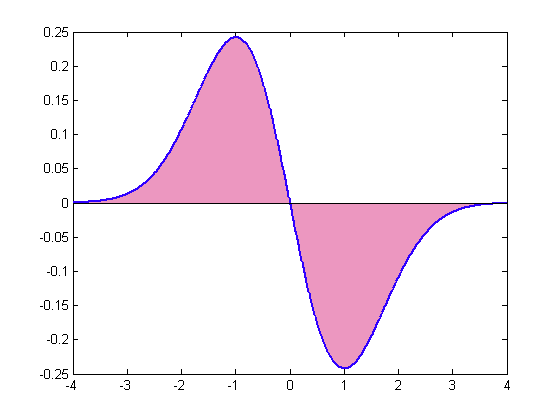


If we denoise image by a Gaussian filter then use Laplacian, we have
$\displaystyle \triangle \{ G(x,y) * f(x,y)\} = \triangle\{G(x,y)\}*f(x,y) = LoG * f(x,y)$

So we can compute the Laplacian of Gaussian function first. For 2nd derivative of $ x$ , we have

$\displaystyle \frac{\partial^2}{\partial^2 x} G(x,y) = \frac{1}{2\pi\sigma^2}\frac{x^2 - \sigma^2}{\sigma^4}\exp\{-\frac{x^+y^2}{2\sigma^2}\}$

Compute the 2nd derivative of $ y$ in same way, and we get LoG as

$\displaystyle LoG$	$\displaystyle = \frac{\partial^2}{\partial x^2} G(x,y) + \frac{\partial^2}{\partial y^2} G(x,y)$	
$\displaystyle = -\frac{1}{\pi\sigma^4}\left ( 1 - \frac{x^2+y^2}{2\sigma^2}\right )\exp\{-\frac{x^2+y^2}{2\sigma^2}\}$


$\color{red}{\text{Laplacian is the second Gaussian derivative, so it must be multiplied by }}$ <font color='blue' font size = 5 > $\sigma^2$
</font>

$\displaystyle Normalized LoG$ $\displaystyle = -\frac{1}{\pi\sigma^2}\left ( 1 - \frac{x^2+y^2}{2\sigma^2}\right )\exp\{-\frac{x^2+y^2}{2\sigma^2}\}$





<font color ='blue' size = 10> Question 3 </font>

<font color ='purple'>Find out a new edge detection filter that we did not study it before, try to describe it in a professional manner.</font>

## A Novel Edge Detection Algorithm Based on Texture Feature Coding

Based on Abdulkadir Sengur, Yanhui Guo*, Mehmet Ustundag and Ömer Faruk Alcin (A Novel Edge Detection Algorithm Based on Texture Feature Coding),J. Intell. Syst. 2015; 24(2): 235–248 



## 1 What is Texture Feature Analysis
#### Texture is a feature used to partition images into regions of interest and to classify those regions.
#### Texture provides information in the spatial arrangement of colors or intensities in an image.
#### Texture is characterized by the spatial distribution of intensity levels in a neighborhood.

## 2 What is Texture Specturm

In order to understand the proposed methodology, we need first to understand the methods for estimating the texture spectrum (TS), including the texture unit (TU) and the texture unit number (NTU).

The texture unit (TU) is used for extracting the local texture information from a neighborhood of 3 × 3 pixels, which represents the smallest complete unit surrounding the central pixel in all eight directions. 
Recent studies have reported that the calculations in eight directions are probably redundant and that only four directions (0°, 45°, 90°, and 135°) can be used without loss of discriminatory power. Let us consider a neighborhood with only four directions (0°, 45°, 90°, and 135°), which can be noted as a set containing five elements: V = {V0, V1, V2, V3, V4}, where V0 represents the grey-level value of the central pixel and Vi represents the grey-level value of the neighboring pixel i, with i = 1, 2, 3, 4. The key concept of the texture spectrum method is to use the relative intensity relations between pixels, instead of their absolute intensity values (such as the co-occurrence matrix), to represent the local texture aspect, which is more faithful to the texture characteristics. We can define the corresponding texture unit (TU) as a set containing four elements: TU = {E1, E2, E3, E4}, where Ei is determined by comparing the grey-level difference between the central pixel and its four neighbors.


## What is Texture Feature Coding Method

The proposed mechanism analyzed in my report depended on using just a part of the TFCM. In other words, The study was interested in the TFNs where the input gray-level image is transformed to the TFN image by means of differencing in the image domain followed by successive stages of vector classification. After this mapping procedure, thresholding and edge-thinning mechanisms were employed for obtaining the final edge detected image. Modification done at 

## 3 Proposed Method
The TFCM was designed to characterize the texture regions of a given image by transforming the image to a TFN
image. Regarding the TFCM mapping process described, one must note that in each successive class assignment
stage, either quantized difference vectors are mapped to gray-level class numbers, gray-level class numbers are
mapped to initial feature numbers, or initial feature numbers are mapped to TFNs. The resulting feature numbers
at every stage are chosen so that higher feature or class numbers correspond to higher degrees of gray-level variation.
Thus, for the final TFNs, values of 0 represent little gray-level variation and values of 54 represent high degrees
of gray-level variation over the immediate neighborhood of (i, j). When an intensity image has been transformed to
a TFN image, it is possible to apply one of the texture descriptor methods such as gray-level co-occurrence matrices
to the TFN image, and extract features such as mean convergence, code variance, code entropy, and uniformity.
In this study, instead of using the TFCM-based texture feature extraction method, we only considered the
TFN for edge detection. The algorithm for translating a single pixel from an image intensity value to a TFN is
as follows:
### Step 1:
A 3 × 3 matrix z from image I centered at pixel $(i, j)$ such that $z_{2,2} = I_{i,j}$. Assign a numeric threshold $\varepsilon  > 0$.
### Step 2:
Calculate the difference vectors along the directions.


$–– ΔV = [z_{1,2}-z_{2,2}, z_{2,2}-z_{3,2}]′; //Vertical$

$–– ΔH = [z_{2,1}-z_{2,2}, z_{2,2}-z_{2,3}]′; //Horizontal$

$–– ΔD1 = [z_{1,1}-z_{2,2}, z_{2,2}-z_{3,3}]′; //Diagonal$

$–– ΔD2 = [z_{1,3}-z_{2,2}, z_{2,2}-z_{3,1}]′; //Anti-diagonal$


### Step 3:
Apply a threshold to obtain the quantized two-element vectors. The related pseudo-code is given as
follows:

    for U∈{ΔV, ΔH, ΔD1, ΔD2}
      for k∈[1, 2]
        if Uk < –ε
          Uk = –1
        else if Uk > ε
          Uk = 1
        else
          Uk = 0
      end
    end

### Step 4:
Determine the gray-level class number T1(U) from Uk
### Step 5:
Determine the initial feature number T2(primary) from T1(ΔV) and T1(ΔH) and T2(secondary) from
T1(ΔD1) and T1(ΔD2)
### Step 6:
Determine TFN from T2(primary) and T2(secondary) as in the below table

Table Mapping from Primary (1) and Secondary (2) Initial Feature Numbers to TFN.
Initial Feature Number 1
1 2 3 4 5 6 7 8 9 10

Initial Feature Number 2
\begin{vmatrix}
1&0&1&2&3&4&5&6&7&8&9\\
2&1&10&11&12&13&14&15&16&17&18\\
3&2&11&19&20&21&22&23&24&25&26\\
4&3&12&20&27&28&29&30&31&32&33\\
5&4&13&21&28&34&35&36&37&38&39\\
6&5&14&22&29&35&40&41&42&43&44\\
7&6&15&23&30&36&41&45&46&47&48\\
8&7&16&24&31&37&42&46&49&50&51\\
9&8&17&25&32&38&43&47&50&52&53\\
10&9&18&26&33&39&44&48&51&53&54\\
\end{vmatrix}


Finally, an edge-thinning technique is used to remove the redundant points on the edge of the thresholded TFN
image.


## 4 Experimental Results and Analysis
In this section, the proposed TFCM-based edge detection algorithm is compared with a variety of existing
edge detection methods such as Prewitt, Sobel, and Canny. Figure 4A is the original cameraman gray-scale
image with 256 gray-scale levels. Figure 4 panels B to D are the result of the processed original cameraman
image after applying the Prewitt, Sobel, and Canny edge detector, respectively. Figure 4E is the result of
the processed cameraman image by our proposed edge detection algorithm described in this article. For the
Prewitt, Sobel, and Canny algorithms, we used the default parameters that are already defined in Matlab.
For the TFCM algorithm, we assigned 20 for the tolerance (ε) and 7 is assigned as the final thresholding. These
values were determined according to earlier experimental studies.
According to the experimental results shown in Figure 4B–E, Prewitt and Sobel could not detect the
edges of the building and the hand of the cameraman that are shown by dashed red circles and ellipsoids,
respectively. However, Canny and the TFCM-based method could detect the edges of both regions that are
depicted with the red dashed circle and ellipsoid. However, Canny detected many false edges on the grass
region and the trousers of the cameraman. Finally, the TFCM method yielded acceptable edges when we considered
the entire edges of the cameraman image.



# References
#### D.C. He, L. Wang, Textural filters based on the texture spectrum, Pattern Recognition (1991)

#### Abdulkadir Sengur, Yanhui Guo*, Mehmet Ustundag and Ömer Faruk Alcin (A Novel Edge Detection Algorithm Based on Texture Feature Coding),J. Intell. Syst. 2015; 24(2): 235–248 

#### M. H. Horng, Texture feature coding method for texture classification, Opt. Eng. 42 (2003), 228–238.

#### Texture Features for Anti-Tank Landmine Detection Using Ground Penetrating Radar Peter Torrione, and Leslie M. Collins, Senior Member, IEEE.
